[System] Directory contents cleared.
[System] File transfer complete.
[System] Archive extracted and main file renamed to processed_input.csv
[Info] Dataset successfully parsed.


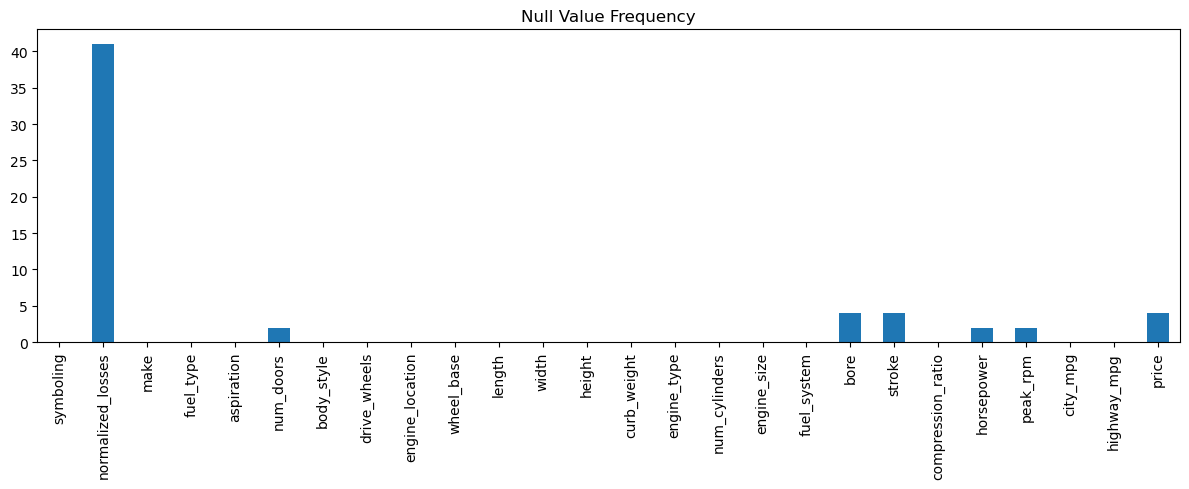

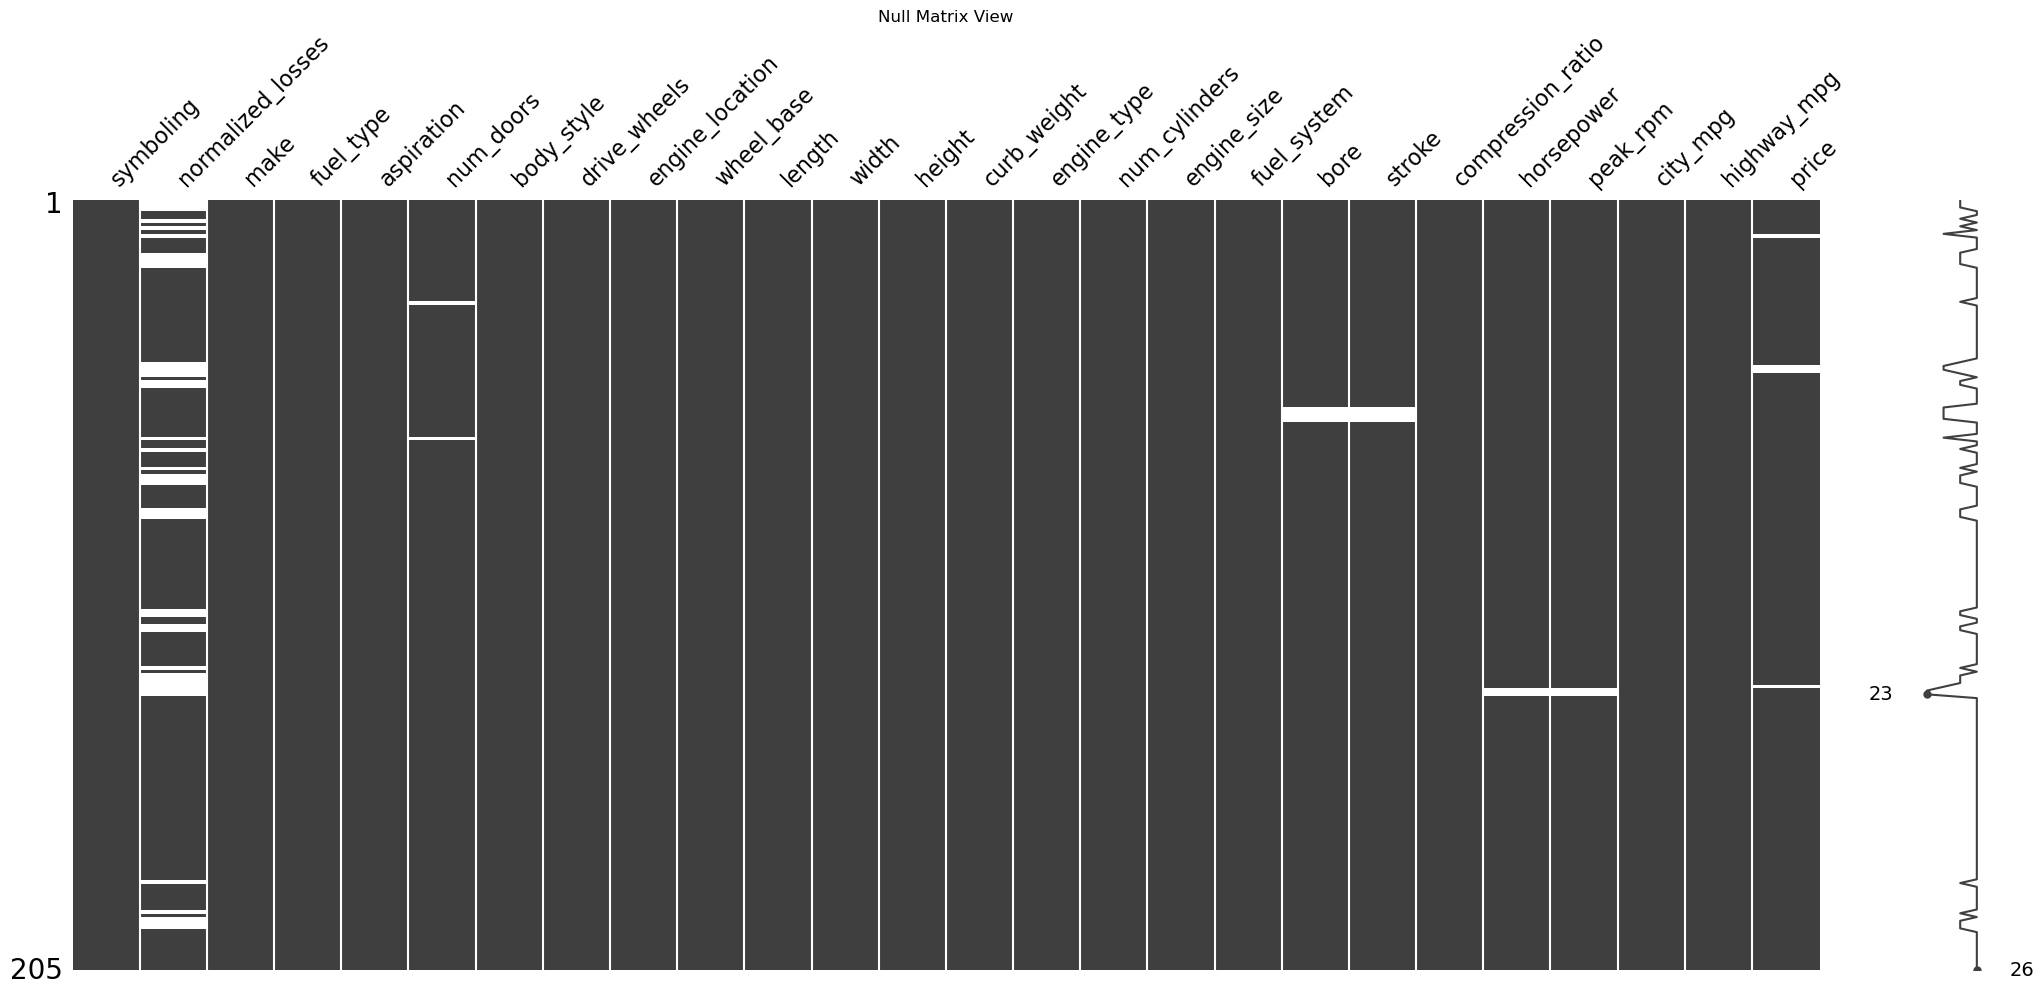

[Info] Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_si

In [9]:
import os
import urllib.request as net
import time as t
import zipfile as zf
import pandas as pd
import numpy as np
import missingno as mvis
import matplotlib.pyplot as mplt
from tabulate import tabulate as tb
import seaborn as sn 
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import parallel_coordinates
from pandas.plotting import radviz

class DataExtractor:
    def __init__(self, root):
        self.base = root
        self.archive_name = "tmp_resource.zip"
        self.final_file = "processed_input.csv"
        self.remote = "https://archive.ics.uci.edu/static/public/10/automobile.zip"

    def prepare_env(self):
        if not os.path.exists(self.base):
            os.makedirs(self.base)
            print("[System] Target directory created.")
        action = input("Purge directory before start? [y/n]: ").strip().lower()
        if action == "y":
            for obj in os.listdir(self.base):
                tgt = os.path.join(self.base, obj)
                if os.path.isfile(tgt):
                    os.remove(tgt)
            print("[System] Directory contents cleared.")
        else:
            print("[System] Purge skipped.")
    def retrieve(self):
        destination = os.path.join(self.base, self.archive_name)
        for attempt in range(1, 4):
            try:
                with net.urlopen(self.remote) as session:
                    payload = session.read()
                with open(destination, 'wb') as out:
                    out.write(payload)
                print("[System] File transfer complete.")
                return
            except Exception as exc:
                print(f"[Warn] Network issue: {exc}")
                if attempt < 3:
                    t.sleep(4)
        raise Exception("[Error] Download failed after multiple attempts.")
    def deploy(self):
        zip_path = os.path.join(self.base, self.archive_name)
        with zf.ZipFile(zip_path, 'r') as arc:
            arc.extractall(self.base)
            for entry in arc.namelist():
                if entry.endswith(".data"):
                    os.rename(
                        os.path.join(self.base, entry),
                        os.path.join(self.base, self.final_file)
                    )
        os.remove(zip_path)
        print(f"[System] Archive extracted and main file renamed to {self.final_file}")
    def data_path(self):
        return os.path.join(self.base, self.final_file)
class DataInspector:
    def __init__(self, file_path):
        self.source = file_path
        self.headers = [
            "symboling", "normalized_losses", "make", "fuel_type", "aspiration",
            "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base",
            "length", "width", "height", "curb_weight", "engine_type", "num_cylinders",
            "engine_size", "fuel_system", "bore", "stroke", "compression_ratio",
            "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"
        ]
        self.df = None
        self.nd = None
    def ingest(self):
        self.df = pd.read_csv(self.source, names=self.headers, na_values="?")
        self.nd = self.df.values
        print("[Info] Dataset successfully parsed.")
    def visualize_gaps(self):
        mplt.figure(figsize=(12, 5))
        self.df.isnull().sum().plot(kind="bar", title="Null Value Frequency")
        mplt.tight_layout()
        mplt.show()
        mvis.matrix(self.df)
        mplt.title("Null Matrix View")
        mplt.show()
    def summary(self):
        print("[Info] Overview:")
        print(self.df.info())
        print("\n[First Records]\n", self.df.head())
        print("\n[Last Records]\n", self.df.tail())
    def preview(self):
        def print_table(data, limit=15):
            if isinstance(data, pd.DataFrame):
                rows = data.head(limit).values.tolist()
                head = data.columns.tolist()
                print(tb(rows, headers=head, tablefmt="pretty"))
            elif isinstance(data, np.ndarray):
                rows = data[:limit].tolist()
                print(tb(rows, tablefmt="pretty"))
            else:
                print("[Error] Unknown type.")
            print("[Preview] DataFrame:")
            print_table(self.df)
            print("[Preview] NumPy Array:")
            print_table(self.nd)
    @staticmethod
    def print_table(data, limit=15):
        if isinstance(data, pd.DataFrame):
            rows = data.head(limit).values.tolist()
            head = data.columns.tolist()
            print(tb(rows, headers=head, tablefmt="pretty"))
        elif isinstance(data, np.ndarray):
            rows = data[:limit].tolist()
            print(tb(rows, tablefmt="pretty"))
        else:
            print("[Error] Unknown type.")

def execute_pipeline():
    base_dir = "D:/зпад/foranakonda_files/forlab4"
    agent = DataExtractor(base_dir)
    agent.prepare_env()
    agent.retrieve()
    agent.deploy()
    path_to_file = agent.data_path()
    auditor = DataInspector(path_to_file)
    auditor.ingest()
    auditor.visualize_gaps()
    auditor.summary()
    auditor.preview()


if __name__ == "__main__":
    execute_pipeline()


1. Поборотися із зниклими даними. Для цього подивитись https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-
python-a-complete-guide/

C:\Users\Виктор\AppData\Local\Temp\ipykernel_11144\2398961183.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  mplt.tight_layout()


<Figure size 1200x500 with 0 Axes>

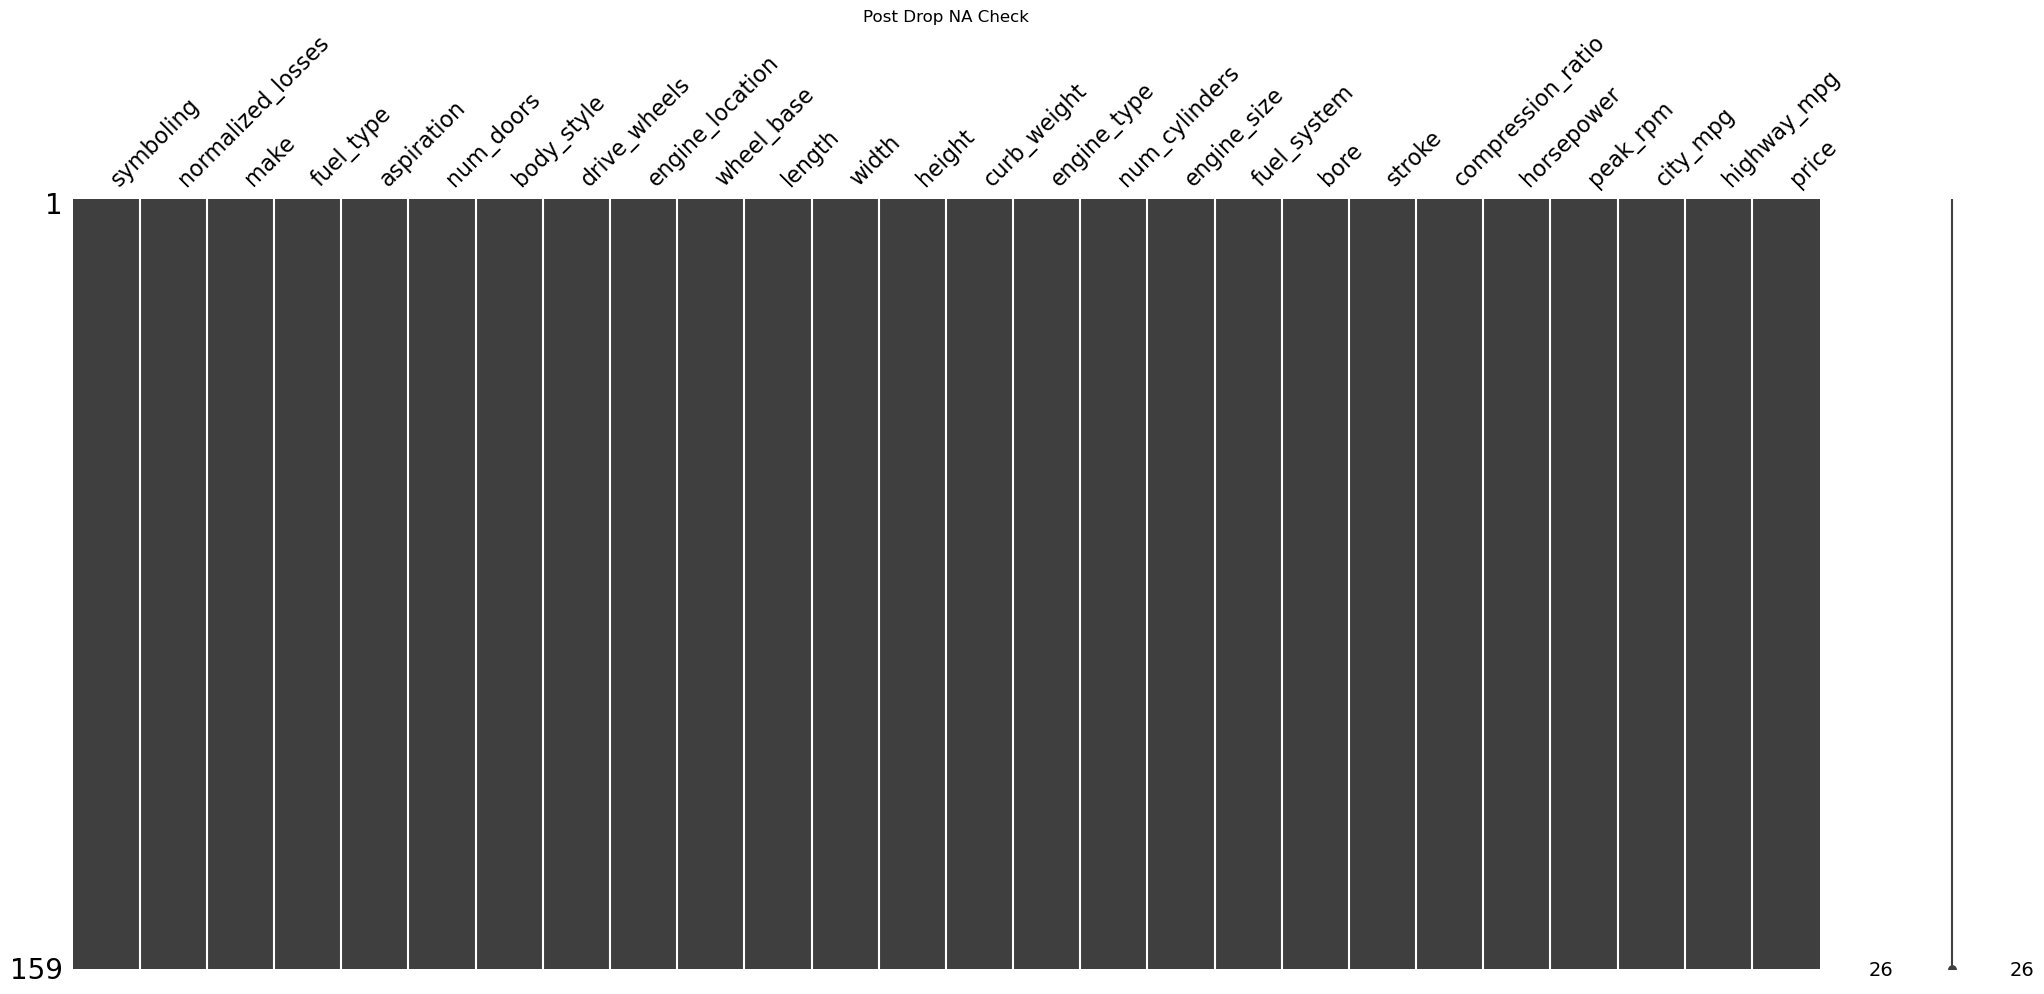

+-----------+-------------------+-----------+-----------+------------+-----------+------------+--------------+-----------------+------------+--------+-------+--------+-------------+-------------+---------------+-------------+-------------+------+--------+-------------------+------------+----------+----------+-------------+---------+
| symboling | normalized_losses |   make    | fuel_type | aspiration | num_doors | body_style | drive_wheels | engine_location | wheel_base | length | width | height | curb_weight | engine_type | num_cylinders | engine_size | fuel_system | bore | stroke | compression_ratio | horsepower | peak_rpm | city_mpg | highway_mpg |  price  |
+-----------+-------------------+-----------+-----------+------------+-----------+------------+--------------+-----------------+------------+--------+-------+--------+-------------+-------------+---------------+-------------+-------------+------+--------+-------------------+------------+----------+----------+-------------+------

C:\Users\Виктор\AppData\Local\Temp\ipykernel_11144\2398961183.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  mplt.tight_layout()


<Figure size 1200x500 with 0 Axes>

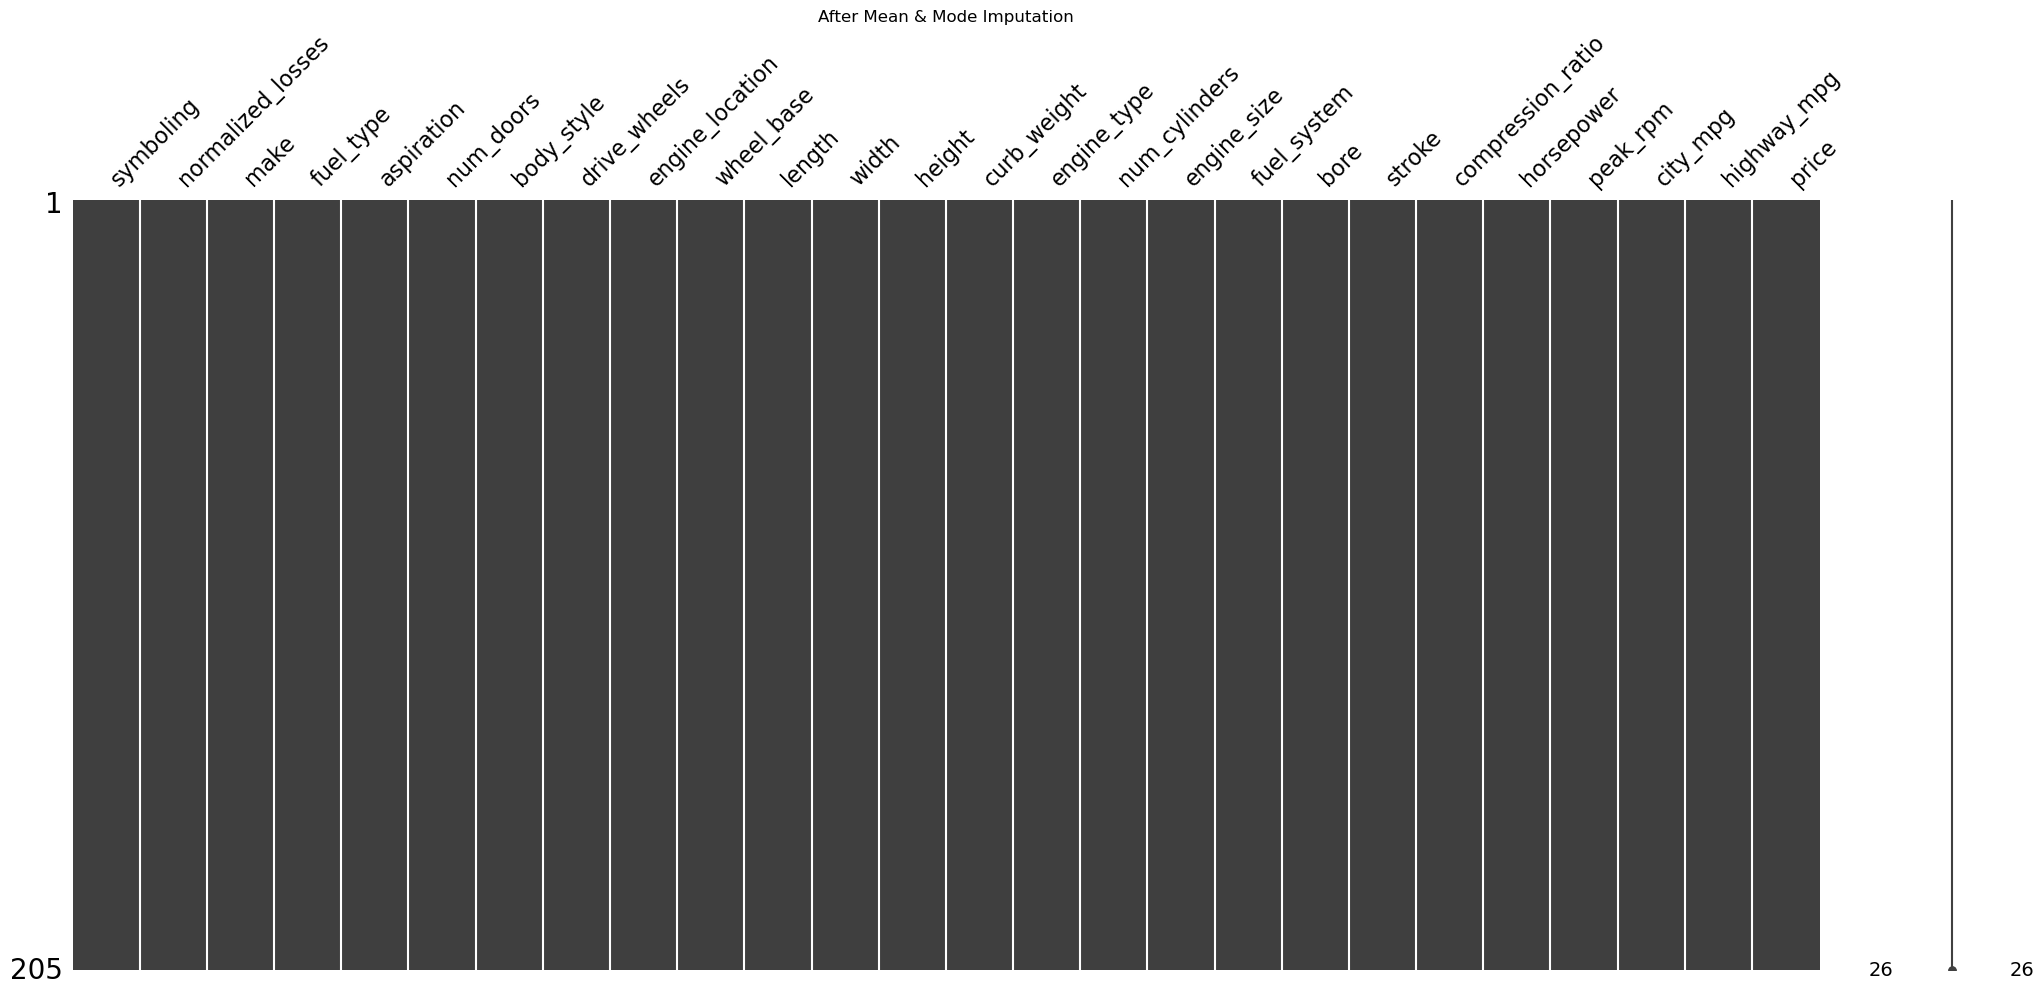

+-----------+-------------------+-------------+-----------+------------+-----------+-------------+--------------+-----------------+------------+--------+-------+--------+-------------+-------------+---------------+-------------+-------------+------+--------+-------------------+------------+----------+----------+-------------+--------------------+
| symboling | normalized_losses |    make     | fuel_type | aspiration | num_doors | body_style  | drive_wheels | engine_location | wheel_base | length | width | height | curb_weight | engine_type | num_cylinders | engine_size | fuel_system | bore | stroke | compression_ratio | horsepower | peak_rpm | city_mpg | highway_mpg |       price        |
+-----------+-------------------+-------------+-----------+------------+-----------+-------------+--------------+-----------------+------------+--------+-------+--------+-------------+-------------+---------------+-------------+-------------+------+--------+-------------------+------------+----------+

C:\Users\Виктор\AppData\Local\Temp\ipykernel_11144\2398961183.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  mplt.tight_layout()


<Figure size 1200x500 with 0 Axes>

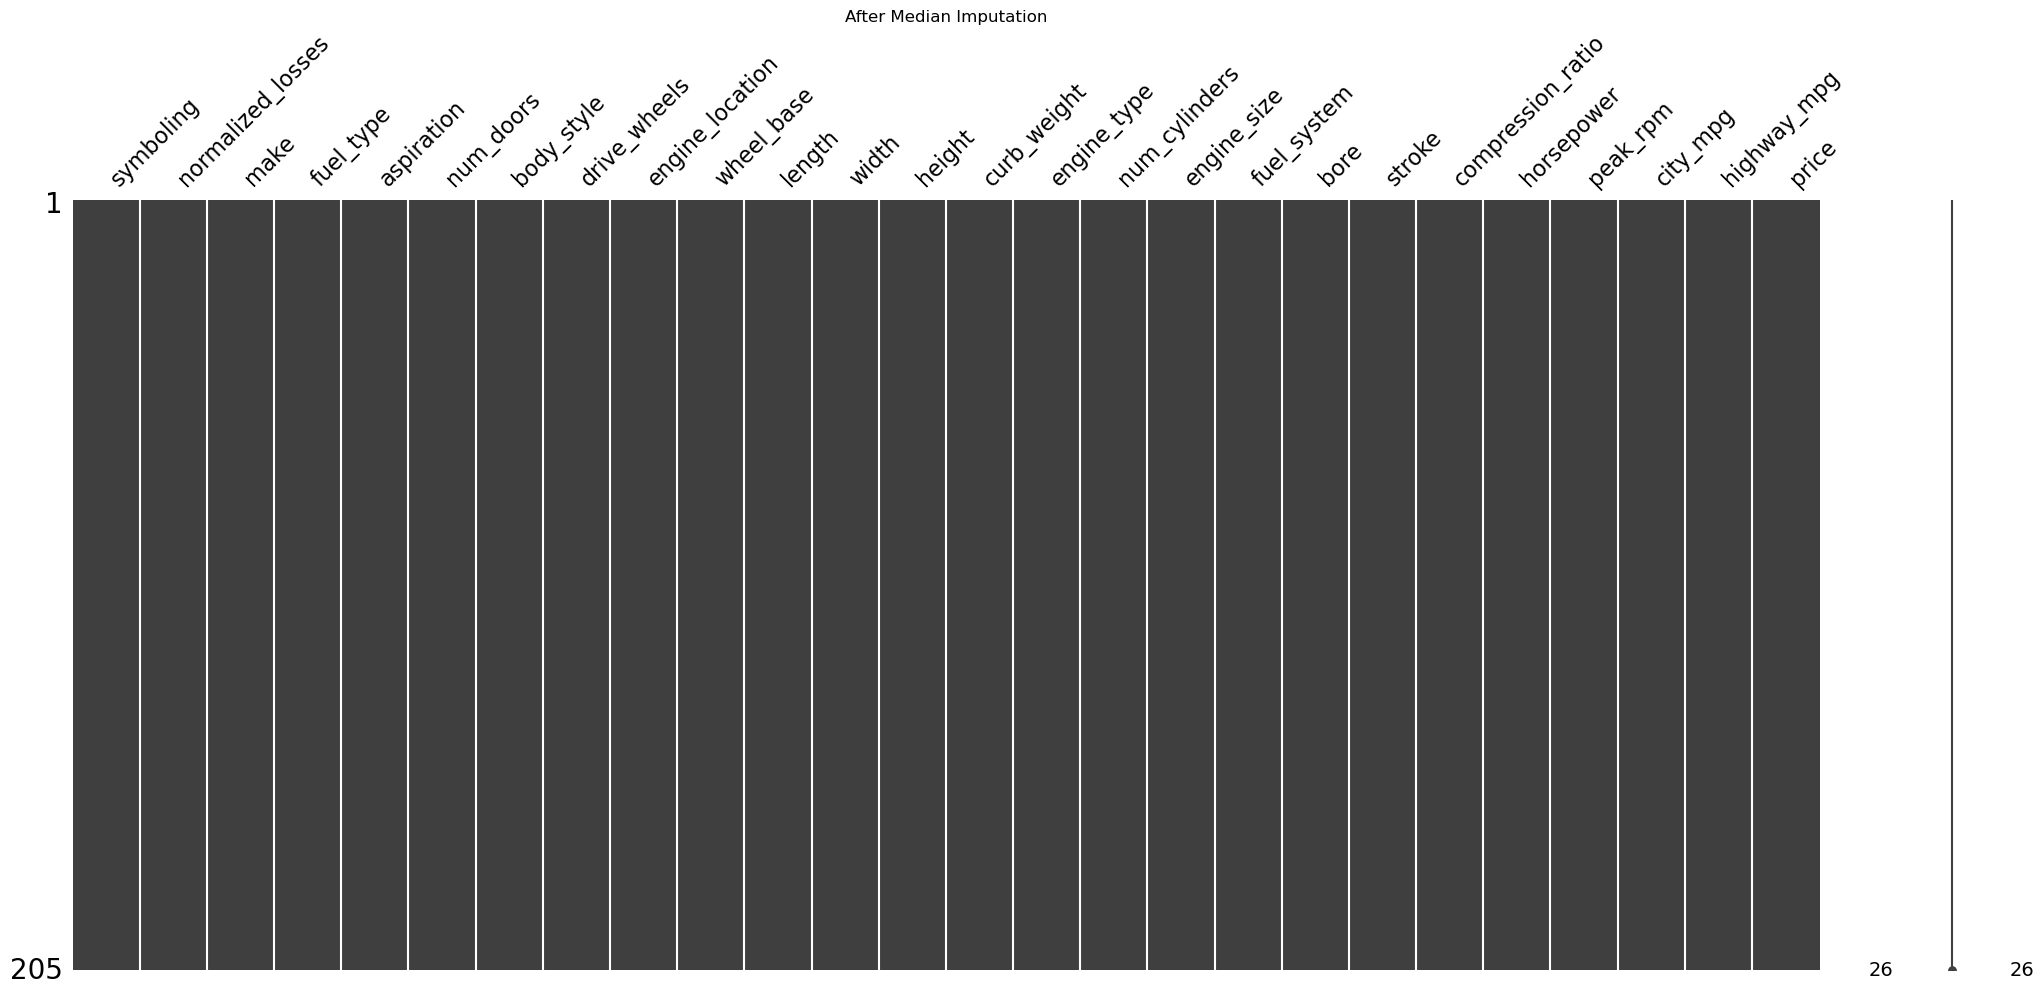

+-----------+-------------------+-------------+-----------+------------+-----------+-------------+--------------+-----------------+------------+--------+-------+--------+-------------+-------------+---------------+-------------+-------------+------+--------+-------------------+------------+----------+----------+-------------+---------+
| symboling | normalized_losses |    make     | fuel_type | aspiration | num_doors | body_style  | drive_wheels | engine_location | wheel_base | length | width | height | curb_weight | engine_type | num_cylinders | engine_size | fuel_system | bore | stroke | compression_ratio | horsepower | peak_rpm | city_mpg | highway_mpg |  price  |
+-----------+-------------------+-------------+-----------+------------+-----------+-------------+--------------+-----------------+------------+--------+-------+--------+-------------+-------------+---------------+-------------+-------------+------+--------+-------------------+------------+----------+----------+-----------

In [ ]:
from sklearn.impute import SimpleImputer

class NullHandler:
    def __init__(self, data_src):
        self.path = data_src
        self.frame = None
        self.array = None
        self.fields = [
            "symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors",
            "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width",
            "height", "curb_weight", "engine_type", "num_cylinders", "engine_size",
            "fuel_system", "bore", "stroke", "compression_ratio", "horsepower",
            "peak_rpm", "city_mpg", "highway_mpg", "price"
        ]

    def _draw_missing_map(self, title="Null Overview"):
        mplt.figure(figsize=(12, 5))
        mvis.matrix(self.frame)
        mplt.title(title)
        mplt.tight_layout()
        mplt.show()

    def load_and_drop_nulls(self):
        self.frame = pd.read_csv(self.path, names=self.fields, na_values="?")
        self.frame.dropna(inplace=True)
        self.array = self.frame.to_numpy()
        self._draw_missing_map("Post Drop NA Check")
        return self.frame, self.array

    def fill_statistical(self):
        self.frame = pd.read_csv(self.path, names=self.fields)
        numeric_targets = ["normalized_losses", "price", "horsepower", "bore", "peak_rpm", "stroke"]
        for attr in numeric_targets:
            mean_value = self.frame[self.frame[attr] != "?"][attr].astype(float).mean()
            self.frame[attr] = self.frame[attr].replace("?", np.nan).astype(float).fillna(mean_value)

        doors_mode = self.frame[self.frame["num_doors"] != "?"]["num_doors"].mode().iloc[0]
        self.frame["num_doors"] = self.frame["num_doors"].replace("?", np.nan).fillna(doors_mode)

        self.array = self.frame.to_numpy()
        self._draw_missing_map("After Mean & Mode Imputation")
        return self.frame, self.array

    def fill_median(self):
        self.frame = pd.read_csv(self.path, names=self.fields)
        strategy_cols = ["normalized_losses", "price", "horsepower", "bore", "peak_rpm", "stroke"]
        for feature in strategy_cols:
            self.frame[feature] = self.frame[feature].replace("?", np.nan).astype(float)
            imputer = SimpleImputer(strategy="median")
            self.frame[feature] = imputer.fit_transform(self.frame[[feature]])

        self.array = self.frame.to_numpy()
        self._draw_missing_map("After Median Imputation")
        return self.frame, self.array


def demo_handling_modes():
    dataset_path = "D:/зпад/foranakonda_files/forlab4/processed_input.csv"
    processor = NullHandler(dataset_path)

    df_clean_1, np_clean_1 = processor.load_and_drop_nulls()
    DataInspector.print_table(df_clean_1)
    DataInspector.print_table(np_clean_1)

    df_clean_2, np_clean_2 = processor.fill_statistical()
    DataInspector.print_table(df_clean_2)
    DataInspector.print_table(np_clean_2)
    print("[Check] Unique values in cylinders:", df_clean_2["num_cylinders"].unique())

    df_clean_3, np_clean_3 = processor.fill_median()
    DataInspector.print_table(df_clean_3)
    DataInspector.print_table(np_clean_3)


if __name__ == "__main__":
    demo_handling_modes()


2. Пронормувати вибраний датасет або стандартизувати його
(нормування і стандартизація мають бути реалізовані як окремі

C:\Users\Виктор\AppData\Local\Temp\ipykernel_11144\2398961183.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  mplt.tight_layout()


<Figure size 1200x500 with 0 Axes>

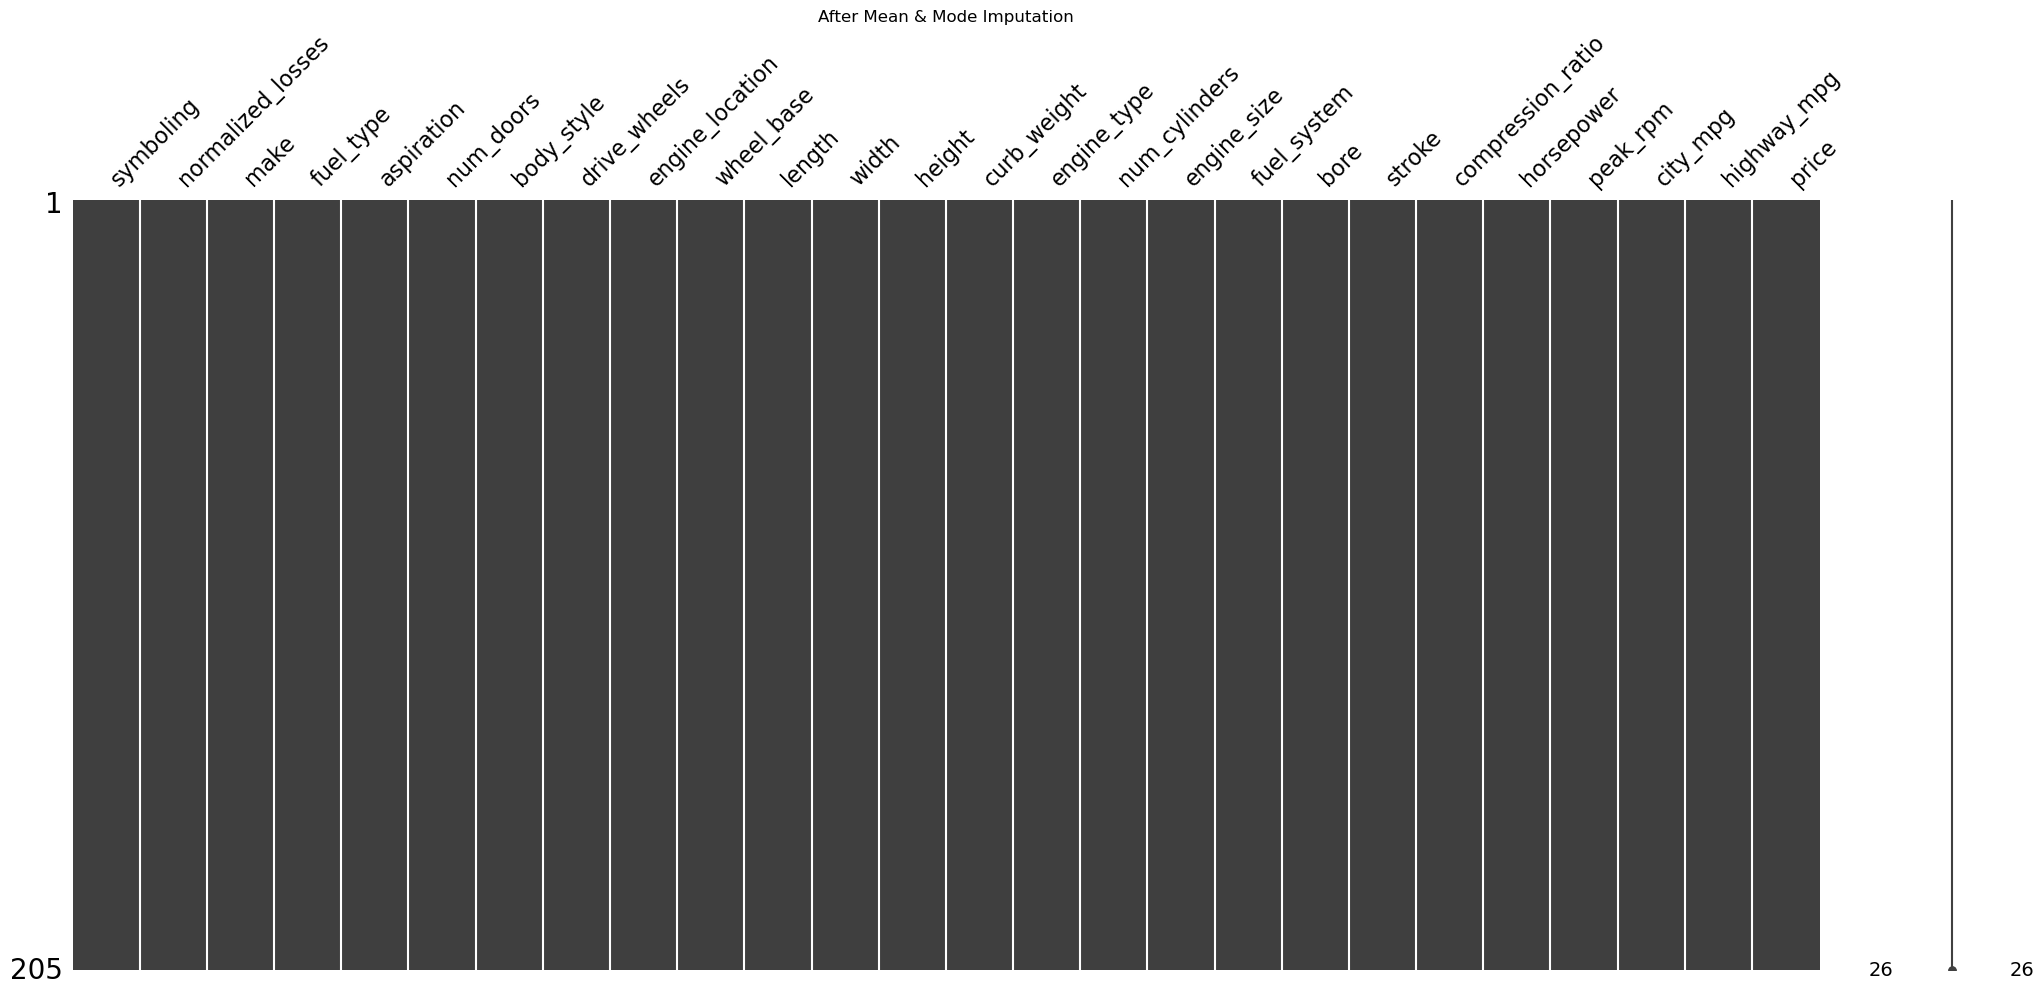

>>> Normalized DataFrame Preview:
+-----------+---------------------+-------------+-----------+------------+-----------+-------------+--------------+-----------------+---------------------+--------------------+---------------------+---------------------+---------------------+-------------+---------------+---------------------+-------------+---------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
| symboling |  normalized_losses  |    make     | fuel_type | aspiration | num_doors | body_style  | drive_wheels | engine_location |     wheel_base      |       length       |        width        |       height        |     curb_weight     | engine_type | num_cylinders |     engine_size     | fuel_system |        bore         |       stroke       |  compression_ratio  |     horsepower      |      peak_rpm       |      city_mpg       |     highway_mpg     |        price        

In [11]:
class Scaler:
    def __init__(self, dataframe):
        self.original_df = dataframe.copy()
        self.numeric_columns = self.original_df.select_dtypes(include=["number"]).columns.tolist()

    def normalize(self):
        norm_df = self.original_df.copy()
        for col in self.numeric_columns:
            min_val = norm_df[col].min()
            max_val = norm_df[col].max()
            if min_val != max_val:
                norm_df[col] = (norm_df[col] - min_val) / (max_val - min_val)
            else:
                norm_df[col] = 0.0 
        return norm_df

    def standardize(self):
        std_df = self.original_df.copy()
        for col in self.numeric_columns:
            mean_val = std_df[col].mean()
            std_dev = std_df[col].std()
            if std_dev != 0:
                std_df[col] = (std_df[col] - mean_val) / std_dev
            else:
                std_df[col] = 0.0  
        return std_df


def run_scaling_demo():
    dataset_path = "D:/зпад/foranakonda_files/forlab4/processed_input.csv"
    cleaner = NullHandler(dataset_path)
    base_df, _ = cleaner.fill_statistical()

    scaler = Scaler(base_df)
    normalized_df = scaler.normalize()
    standardized_df = scaler.standardize()

    print(">>> Normalized DataFrame Preview:")
    DataInspector.print_table(normalized_df)

    print("\n>>> Standardized DataFrame Preview:")
    DataInspector.print_table(standardized_df)


if __name__ == "__main__":
    run_scaling_demo()

3. Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

C:\Users\Виктор\AppData\Local\Temp\ipykernel_11144\2398961183.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  mplt.tight_layout()


<Figure size 1200x500 with 0 Axes>

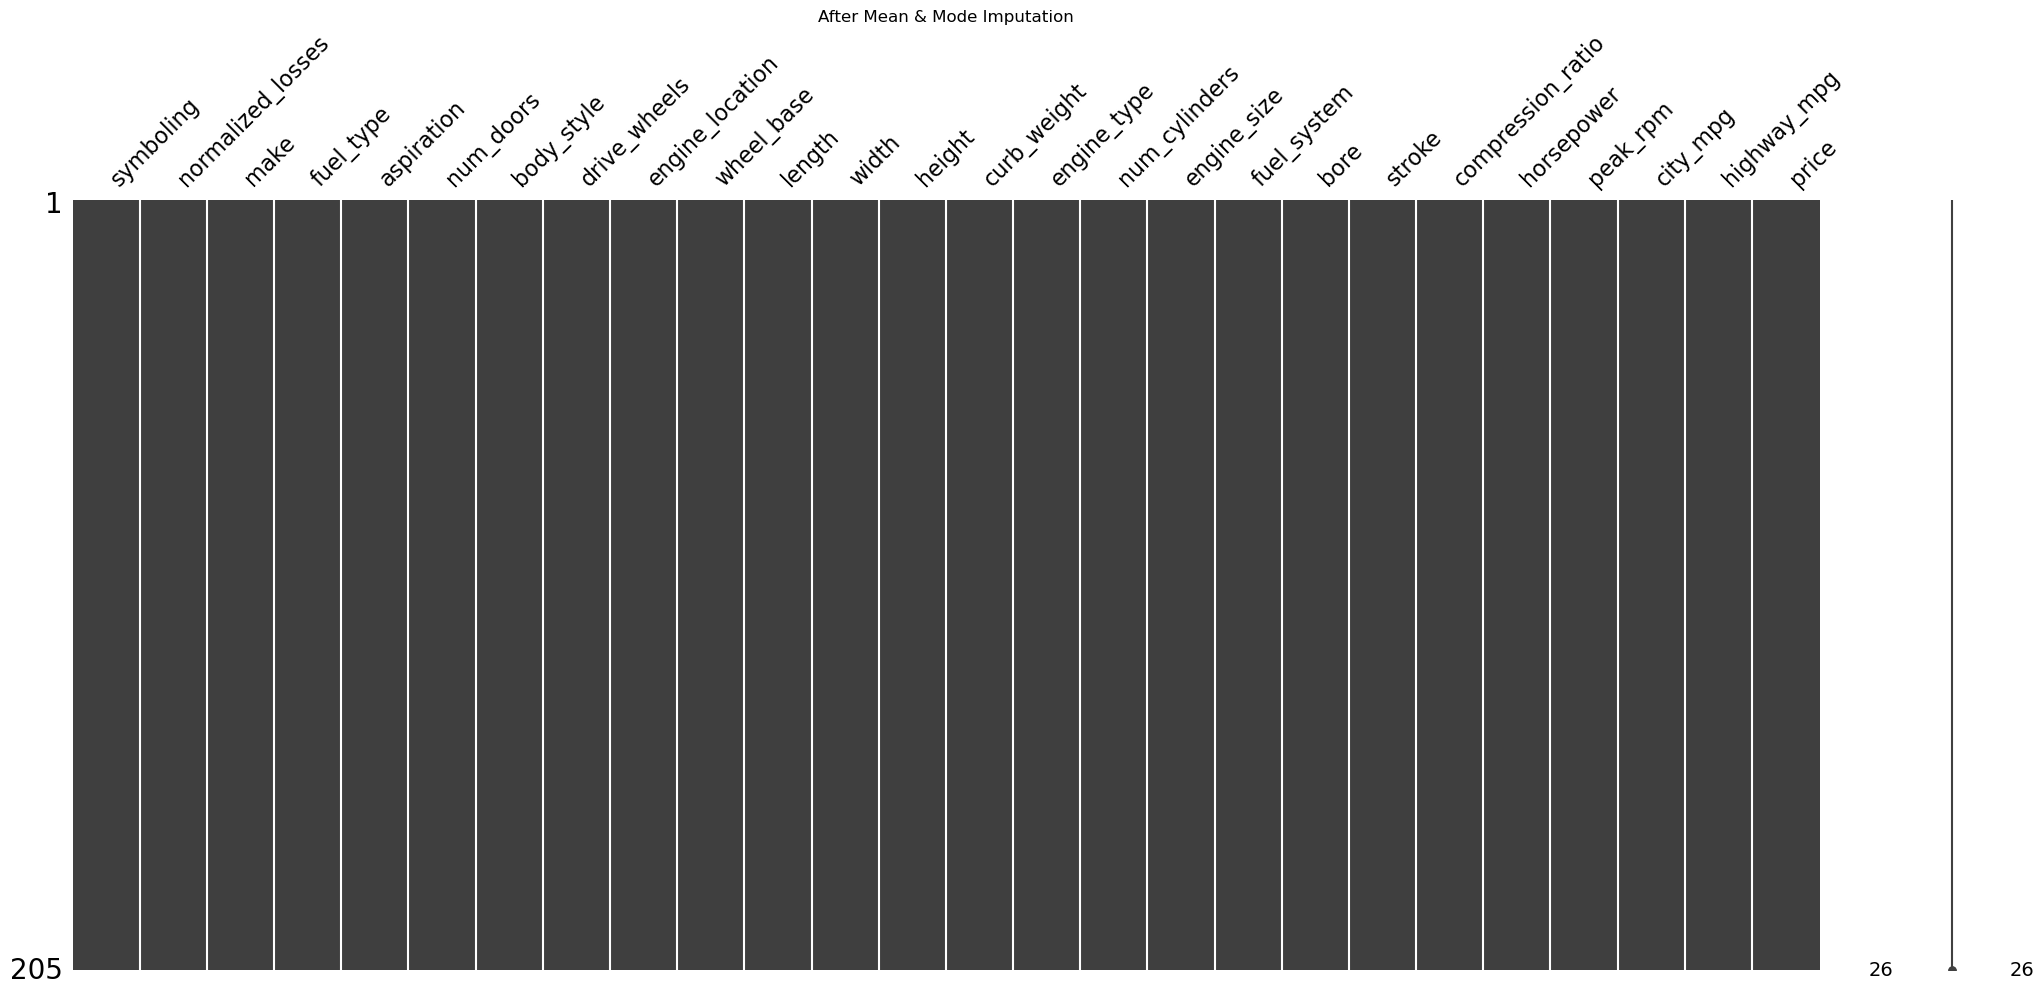

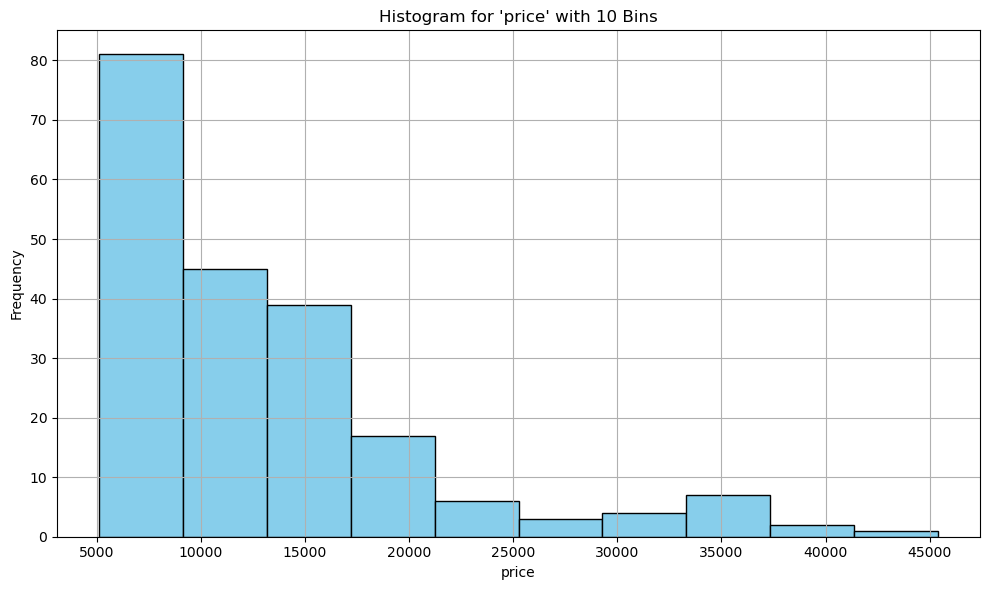

In [ ]:

class HistogramBuilder:
    def __init__(self, dataframe):
        self.df = dataframe

    def plot_histogram(self, column, bins=None):
        import matplotlib.pyplot as plt

        if column not in self.df.columns:
            raise ValueError(f"[Error] Column '{column}' not found in dataset.")

        data_series = self.df[column].dropna()

        if not np.issubdtype(data_series.dtype, np.number):
            raise TypeError(f"[Error] Column '{column}' must be numeric to plot histogram.")
        if bins is None:
            bins = np.linspace(data_series.min(), data_series.max(), 11) 

        plt.figure(figsize=(10, 6))
        plt.hist(data_series, bins=bins, edgecolor='black', color='skyblue')
        plt.title(f"Histogram for '{column}' with 10 Bins")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


def run_histogram_demo():
    dataset_path = "D:/зпад/foranakonda_files/forlab4/processed_input.csv"
    handler = NullHandler(dataset_path)
    cleaned_df, _ = handler.fill_statistical()

    histogrammer = HistogramBuilder(cleaned_df)
    histogrammer.plot_histogram("price") 


if __name__ == "__main__":
    run_histogram_demo()


4. Збудувати графік залежності одного integer/real атрибута від іншого.

C:\Users\Виктор\AppData\Local\Temp\ipykernel_11144\2398961183.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  mplt.tight_layout()


<Figure size 1200x500 with 0 Axes>

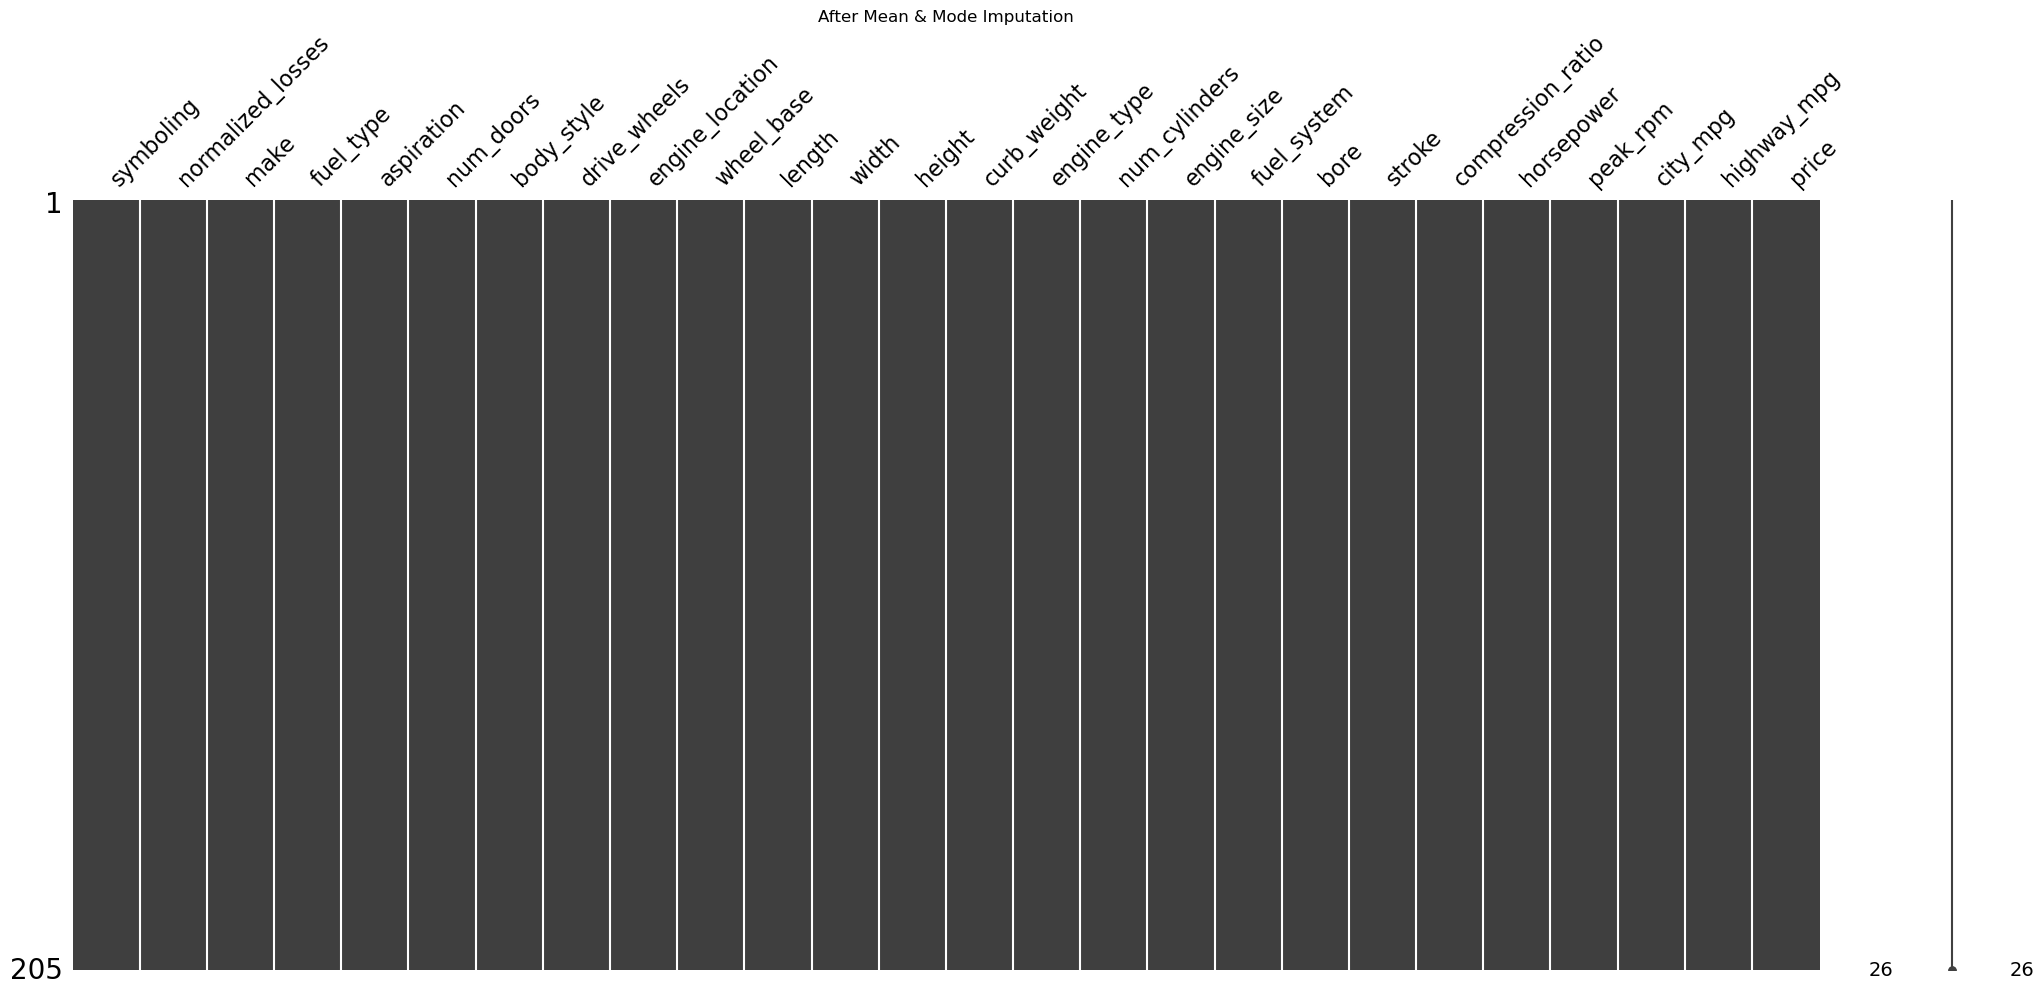

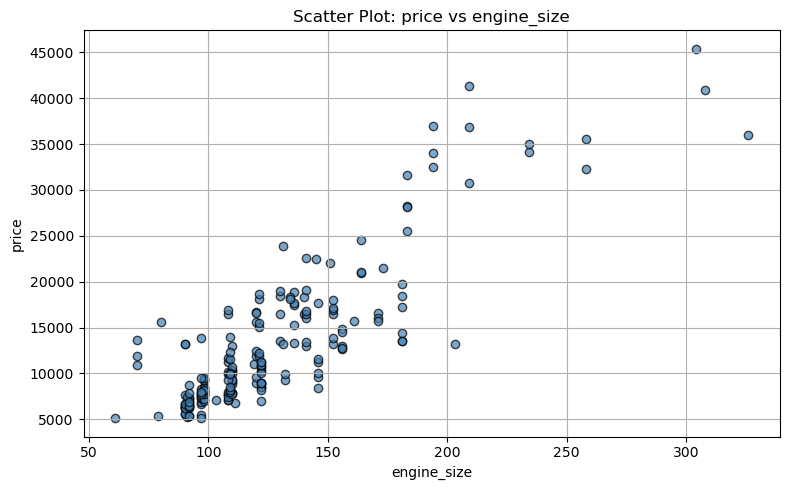

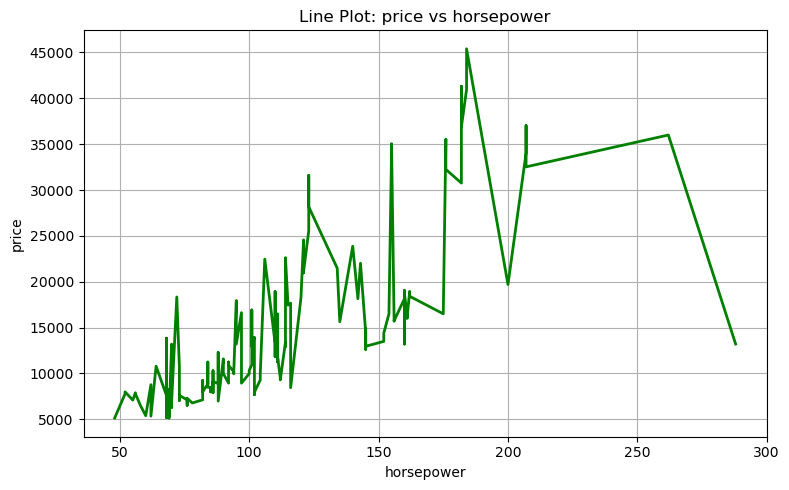

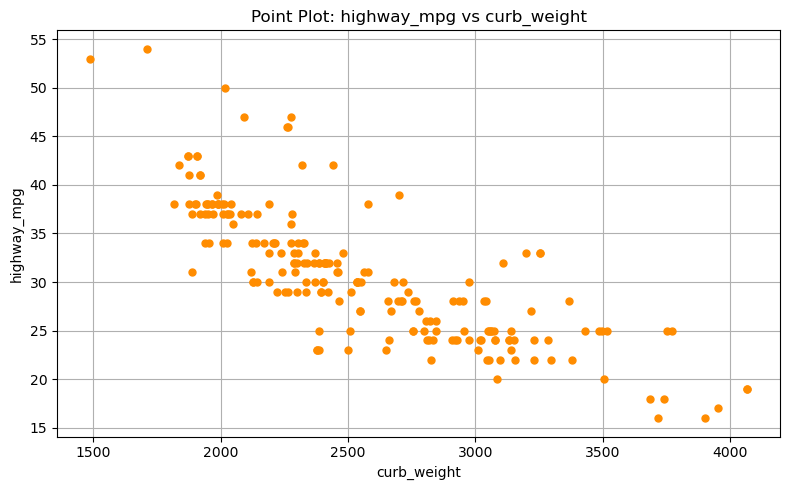

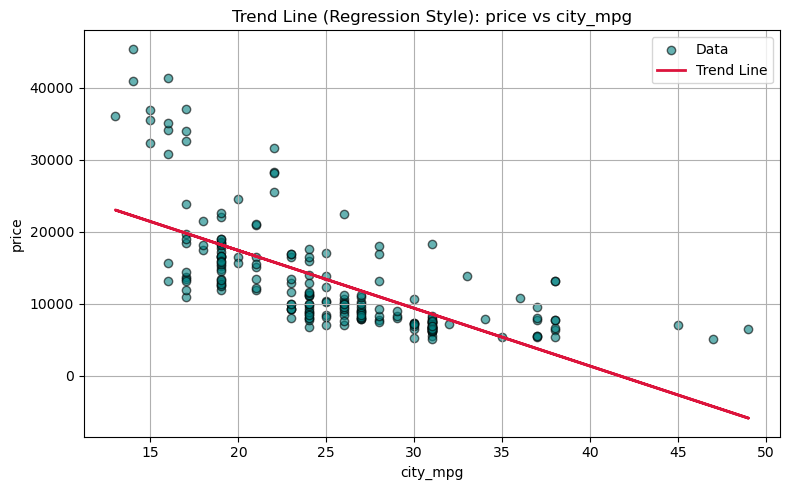

In [ ]:
class RelationVisualizer:
    def __init__(self, dataframe):
        self.df = dataframe.select_dtypes(include=[np.number]).dropna()

    def scatter_plot(self, x_col, y_col):
        plt.figure(figsize=(8, 5))
        plt.scatter(self.df[x_col], self.df[y_col], alpha=0.7, color="steelblue", edgecolor="black")
        plt.title(f"Scatter Plot: {y_col} vs {x_col}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def line_plot(self, x_col, y_col):
        sorted_df = self.df.sort_values(by=x_col)
        plt.figure(figsize=(8, 5))
        plt.plot(sorted_df[x_col], sorted_df[y_col], color="green", linewidth=2)
        plt.title(f"Line Plot: {y_col} vs {x_col}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def point_plot(self, x_col, y_col):
        plt.figure(figsize=(8, 5))
        plt.plot(self.df[x_col], self.df[y_col], 'o', markersize=5, color="darkorange")
        plt.title(f"Point Plot: {y_col} vs {x_col}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def regression_style_plot(self, x_col, y_col):
        from numpy.polynomial.polynomial import Polynomial

        x = self.df[x_col]
        y = self.df[y_col]

        coefs = Polynomial.fit(x, y, deg=1).convert().coef
        trend = coefs[0] + coefs[1] * x

        plt.figure(figsize=(8, 5))
        plt.scatter(x, y, alpha=0.6, label='Data', color="teal", edgecolor='k')
        plt.plot(x, trend, color='crimson', linewidth=2, label='Trend Line')
        plt.title(f"Trend Line (Regression Style): {y_col} vs {x_col}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    


def run_visualization_demo():
    dataset_path = "D:/зпад/foranakonda_files/forlab4/processed_input.csv"
    handler = NullHandler(dataset_path)
    df, _ = handler.fill_statistical()

    visualizer = RelationVisualizer(df)

    visualizer.scatter_plot("engine_size", "price")
    visualizer.line_plot("horsepower", "price")
    visualizer.point_plot("curb_weight", "highway_mpg")
    visualizer.regression_style_plot("city_mpg", "price")

if __name__ == "__main__":
    run_visualization_demo()


5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

C:\Users\Виктор\AppData\Local\Temp\ipykernel_11144\2398961183.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  mplt.tight_layout()


<Figure size 1200x500 with 0 Axes>

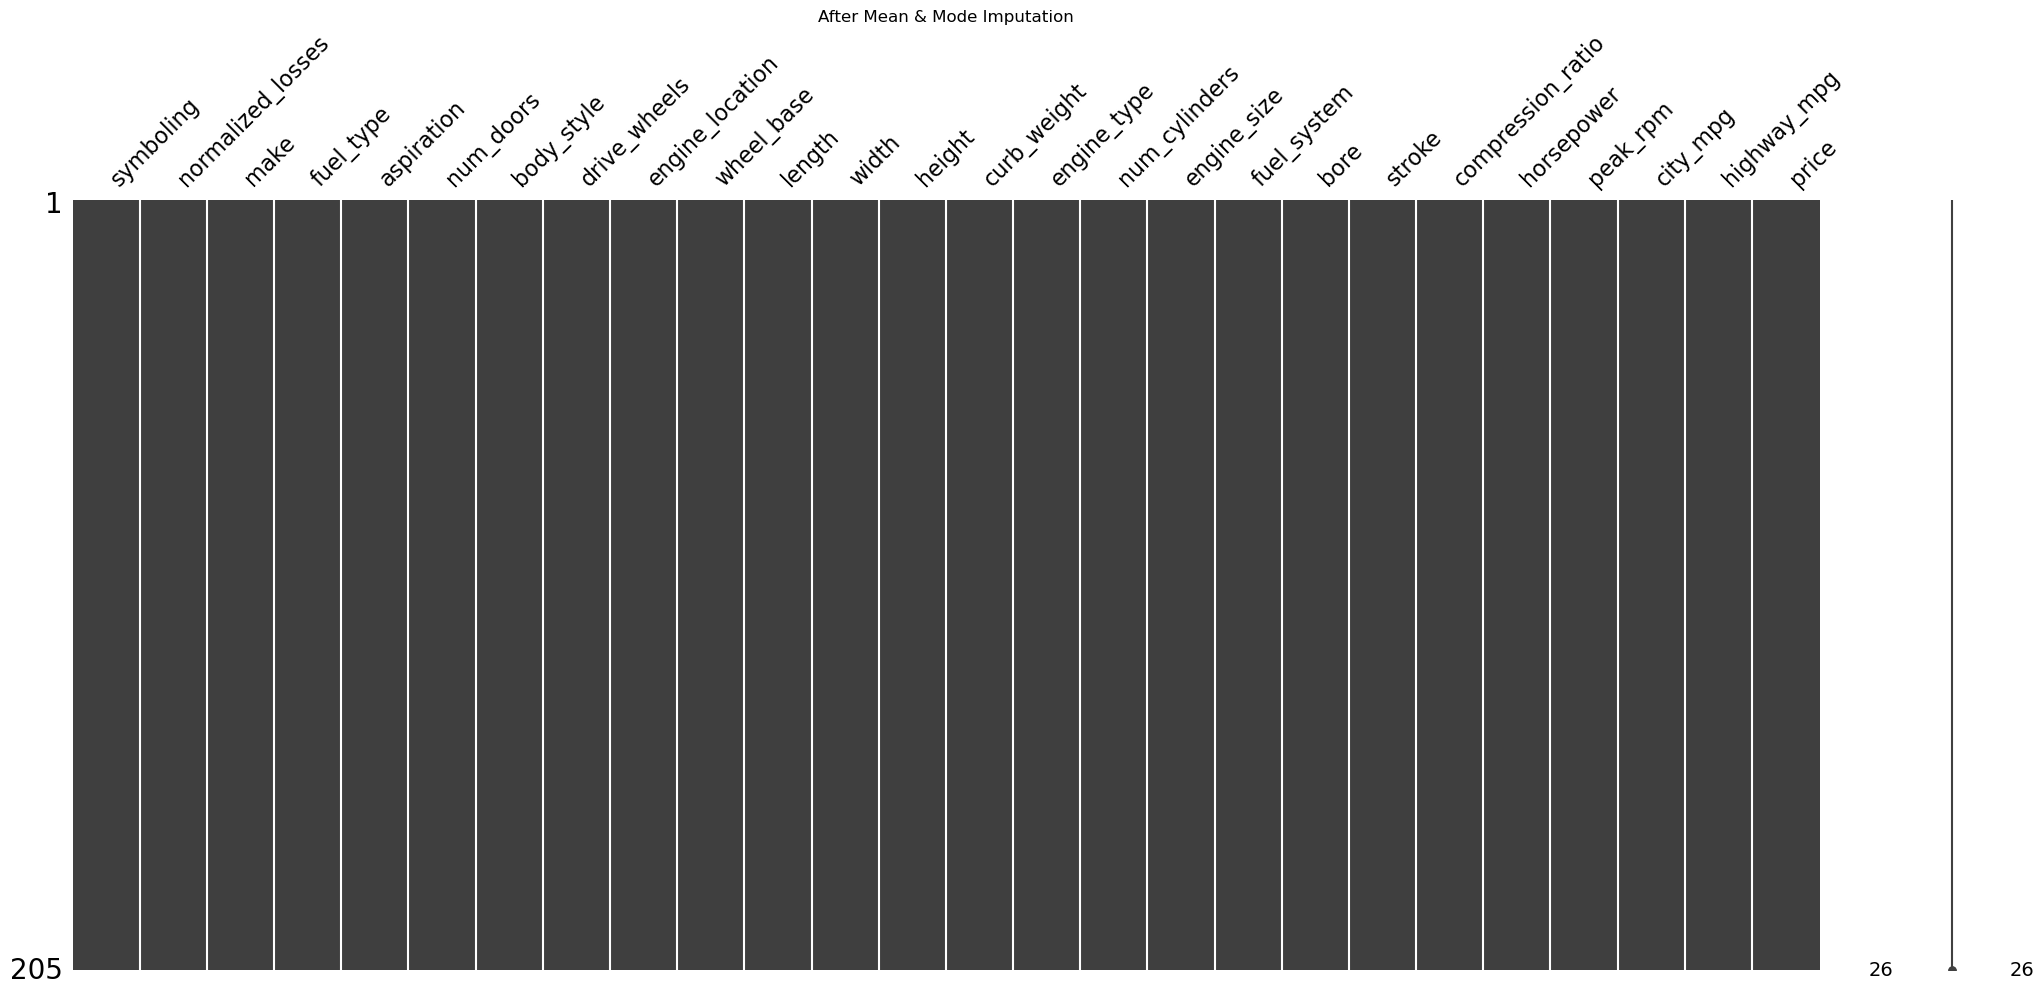

Коефіцієнт кореляції Пірсона між engine_size та price: 0.8618
Коефіцієнт кореляції Спірмена між engine_size та price: 0.8080


In [ ]:
class CorrelationCalculator:
    def __init__(self, dataframe):
        self.df = dataframe.select_dtypes(include=[np.number]).dropna()

    def pearson_correlation(self, x_col, y_col):
        pearson_corr, _ = stats.pearsonr(self.df[x_col], self.df[y_col])
        print(f"Коефіцієнт кореляції Пірсона між {x_col} та {y_col}: {pearson_corr:.4f}")
        return pearson_corr

    def spearman_correlation(self, x_col, y_col):
        spearman_corr, _ = stats.spearmanr(self.df[x_col], self.df[y_col])
        print(f"Коефіцієнт кореляції Спірмена між {x_col} та {y_col}: {spearman_corr:.4f}")
        return spearman_corr

def run_correlation_demo():
    dataset_path = "D:/зпад/foranakonda_files/forlab4/processed_input.csv"
    handler = NullHandler(dataset_path)
    df, _ = handler.fill_statistical()

    calc = CorrelationCalculator(df)

    calc.pearson_correlation("engine_size", "price")
    calc.spearman_correlation("engine_size", "price")

if __name__ == "__main__":
    run_correlation_demo()


6. Провести One Hot Encoding категоріального string атрибуту.

C:\Users\Виктор\AppData\Local\Temp\ipykernel_11144\2398961183.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  mplt.tight_layout()


<Figure size 1200x500 with 0 Axes>

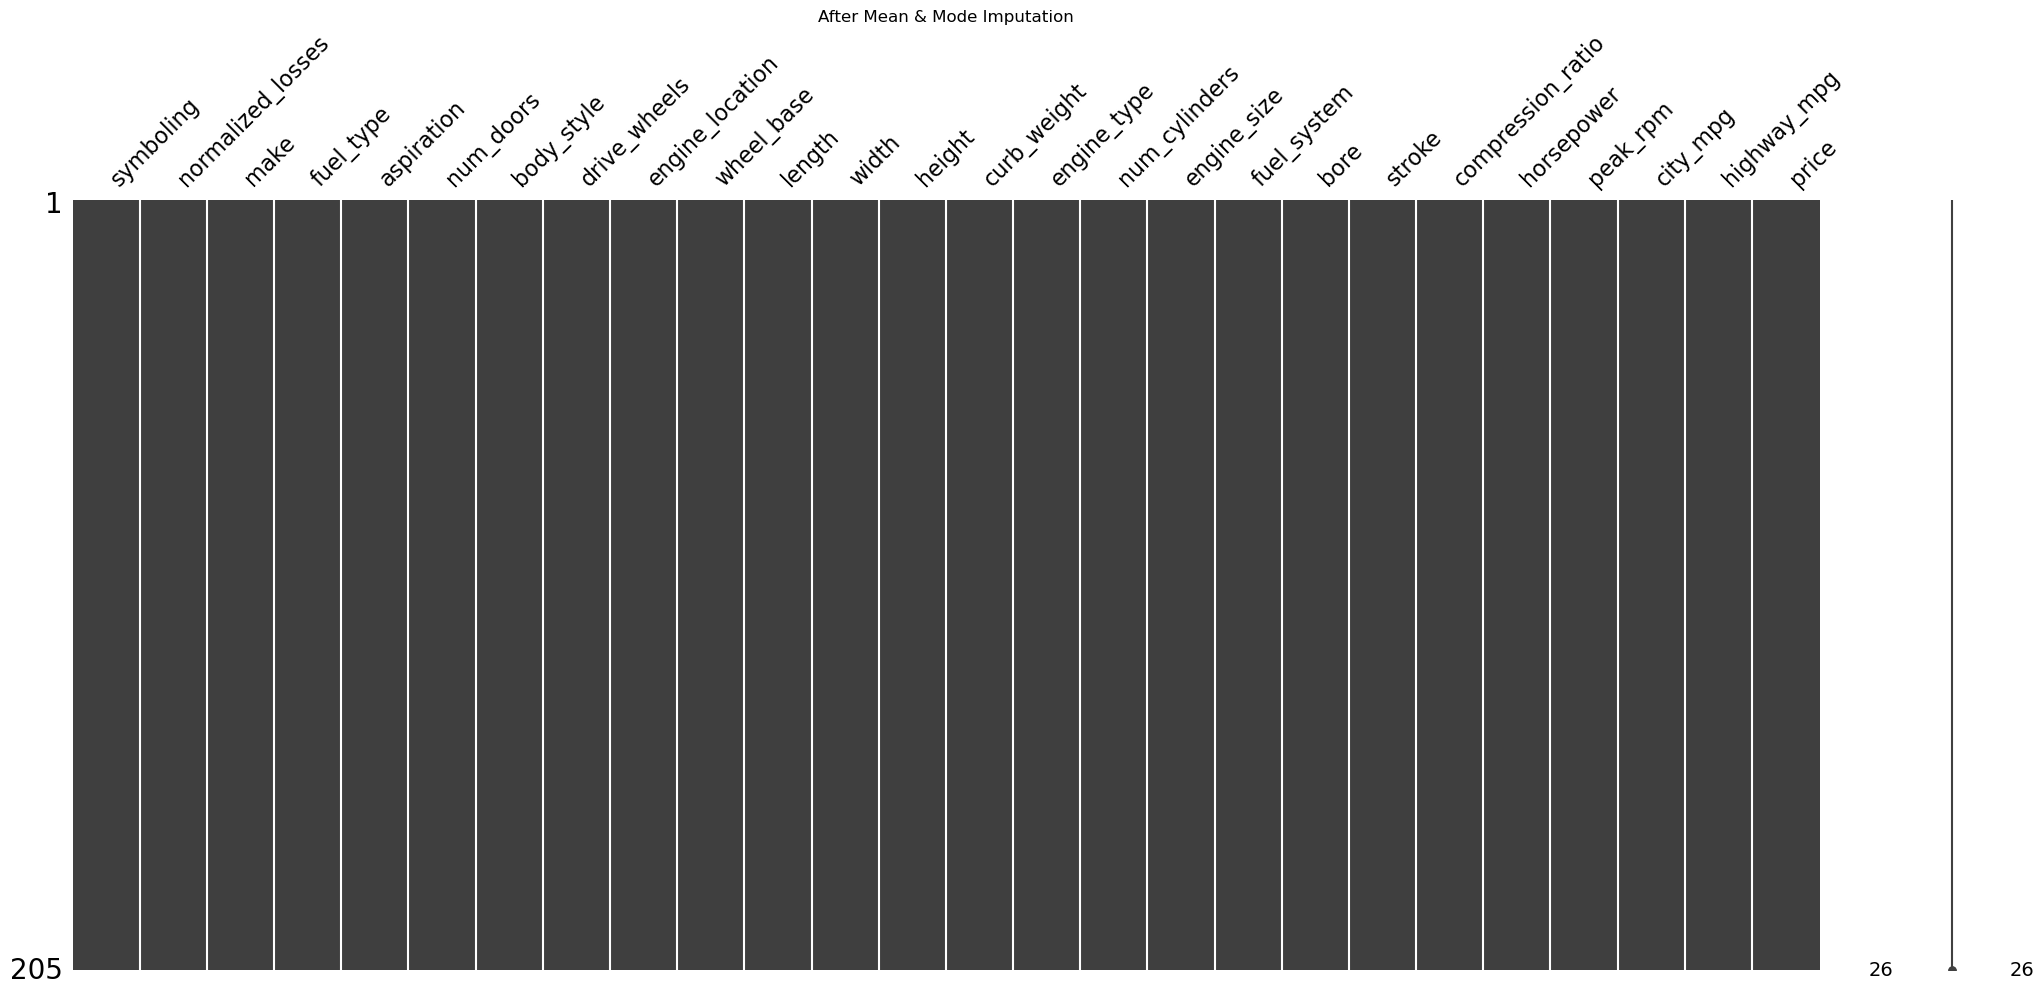

One Hot Encoding виконано для атрибуту 'fuel_type'
Перші 5 рядків після кодування:
   symboling  normalized_losses         make aspiration num_doors  \
0          3              122.0  alfa-romero        std       two   
1          3              122.0  alfa-romero        std       two   
2          1              122.0  alfa-romero        std       two   
3          2              164.0         audi        std      four   
4          2              164.0         audi        std      four   

    body_style drive_wheels engine_location  wheel_base  length  ...  bore  \
0  convertible          rwd           front        88.6   168.8  ...  3.47   
1  convertible          rwd           front        88.6   168.8  ...  3.47   
2    hatchback          rwd           front        94.5   171.2  ...  2.68   
3        sedan          fwd           front        99.8   176.6  ...  3.19   
4        sedan          4wd           front        99.4   176.6  ...  3.19   

   stroke  compression_ratio hors

In [ ]:
import pandas as pd

class OneHotEncoderCustom:
    def __init__(self, dataframe):
        self.original_df = dataframe

    def encode(self, column_name):
        if column_name not in self.original_df.columns:
            raise ValueError(f"Колонка '{column_name}' не знайдена у датафреймі.")

        encoded_df = pd.get_dummies(self.original_df, columns=[column_name])
        print(f"One Hot Encoding виконано для атрибуту '{column_name}'")
        return encoded_df

def run_one_hot_demo():
    dataset_path = "D:/зпад/foranakonda_files/forlab4/processed_input.csv"
    handler = NullHandler(dataset_path)
    df, _ = handler.fill_statistical()
    encoder = OneHotEncoderCustom(df)
    encoded_df = encoder.encode("fuel_type")  

    print("Перші 5 рядків після кодування:")
    print(encoded_df.head())

if __name__ == "__main__":
    run_one_hot_demo()



7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі - https://towardsdatascience.com/the-art-of-
effective-visualization-of-multi-dimensional-data-6c7202990c57.

C:\Users\Виктор\AppData\Local\Temp\ipykernel_11144\2398961183.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  mplt.tight_layout()


<Figure size 1200x500 with 0 Axes>

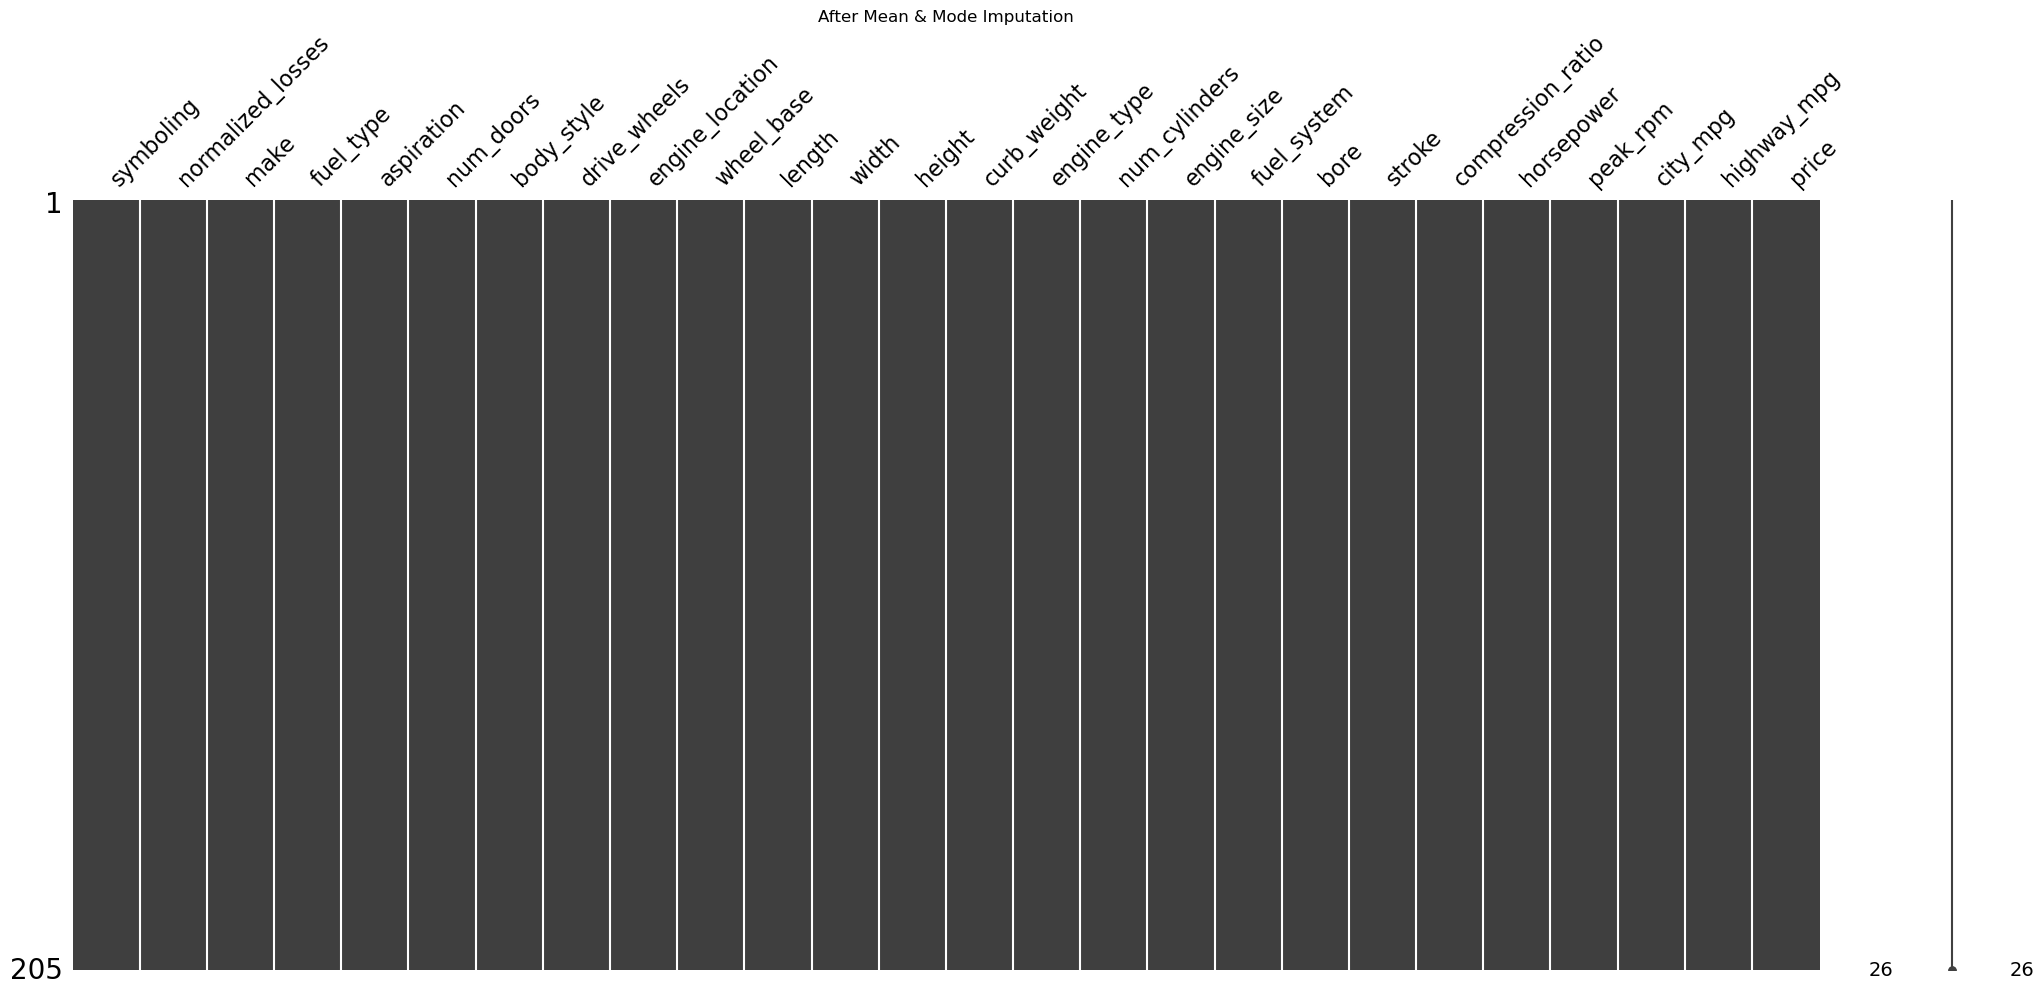

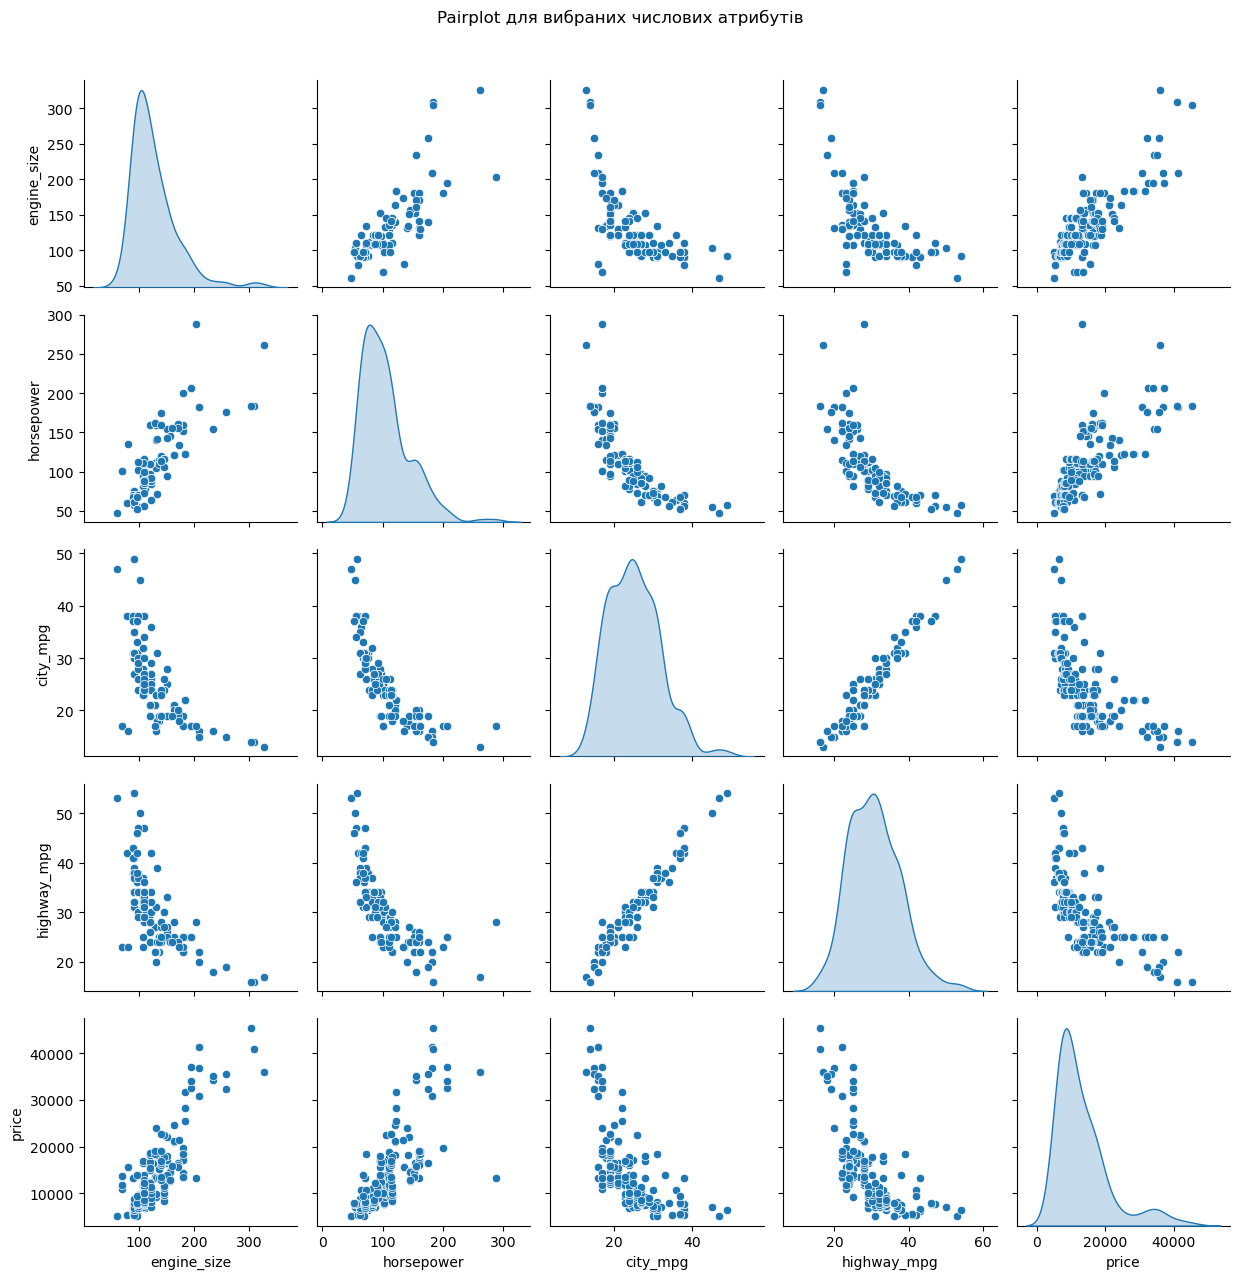

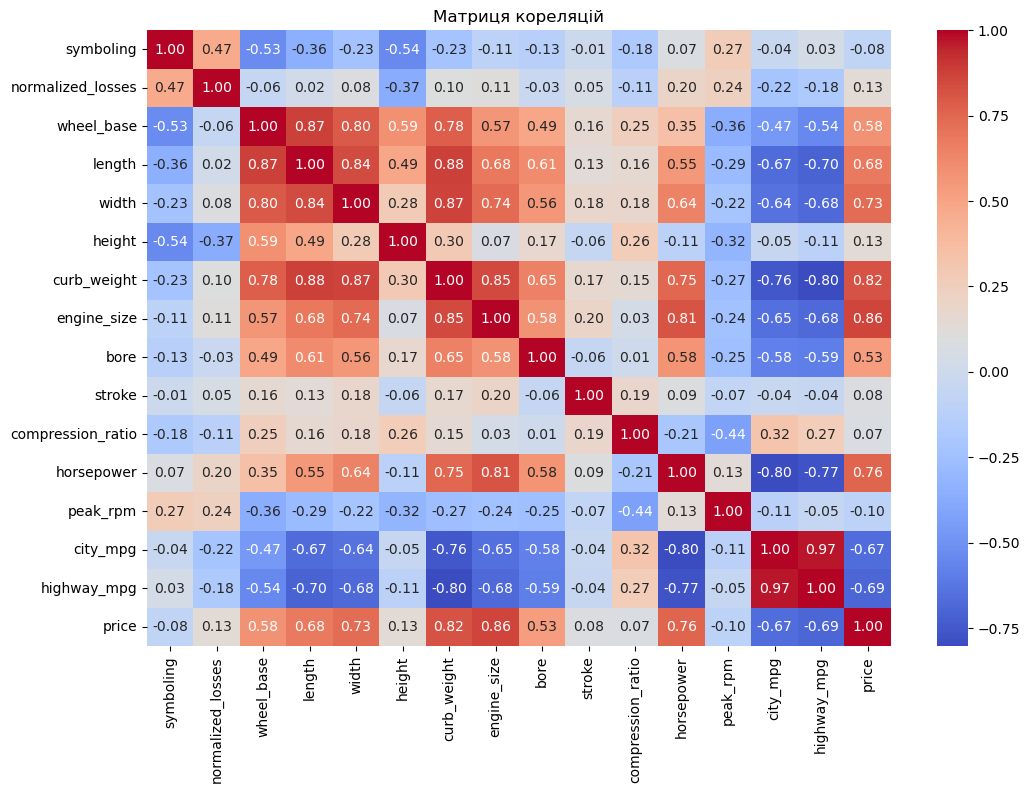

<Figure size 1000x1000 with 0 Axes>

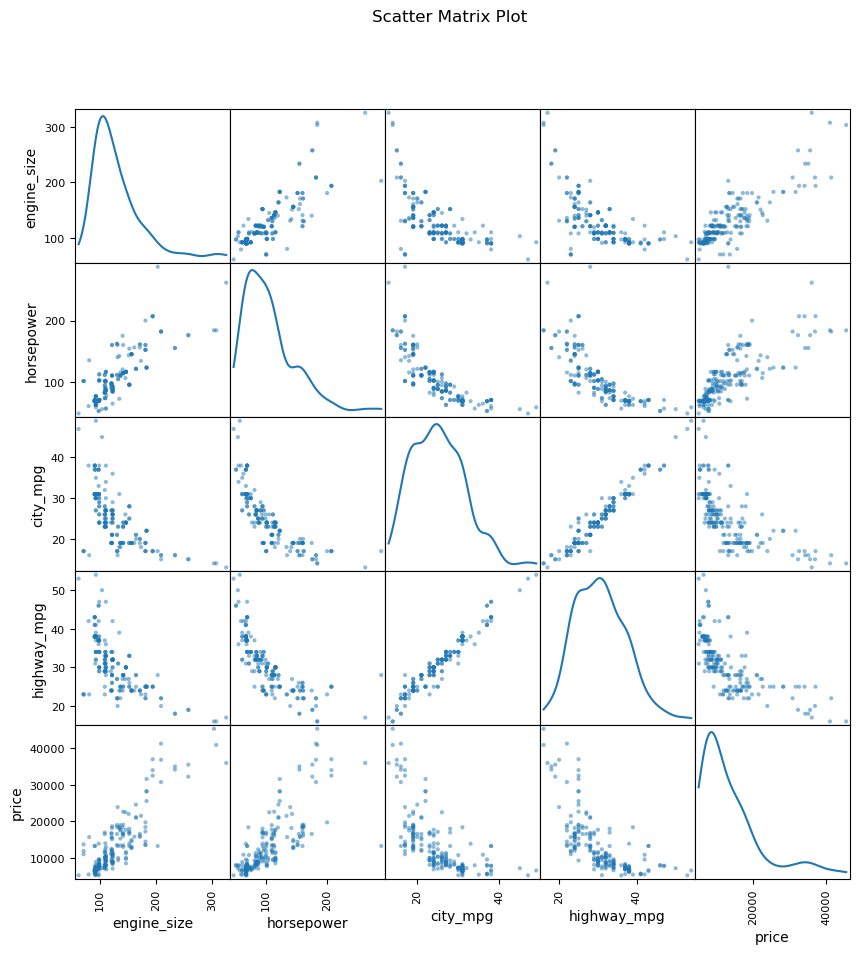

In [ ]:
class MultivariateVisualizer:
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def pairplot(self, selected_columns):
        sns.pairplot(self.df[selected_columns], diag_kind='kde')
        plt.suptitle("Pairplot для вибраних числових атрибутів", y=1.02)
        plt.tight_layout()
        plt.show()

    def heatmap(self):
        plt.figure(figsize=(12, 8))
        numeric_df = self.df.select_dtypes(include=['int64', 'float64'])
        corr_matrix = numeric_df.corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Матриця кореляцій")
        plt.show()


    def scatter_matrix_plot(self, selected_columns):
        plt.figure(figsize=(10, 10))
        scatter_matrix(self.df[selected_columns], figsize=(10, 10), diagonal='kde')
        plt.suptitle("Scatter Matrix Plot")
        plt.show()

def run_multivariate_viz():
    dataset_path = "D:/зпад/foranakonda_files/forlab4/processed_input.csv"
    handler = NullHandler(dataset_path)
    df, _ = handler.fill_statistical()

    visualizer = MultivariateVisualizer(df)
    numeric_cols = ["engine_size", "horsepower", "city_mpg", "highway_mpg", "price"]
    visualizer.pairplot(numeric_cols)
    visualizer.heatmap()
    visualizer.scatter_matrix_plot(numeric_cols)

if __name__ == "__main__":
    run_multivariate_viz()